In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('diamonds.csv')

In [31]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [35]:
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

<AxesSubplot:xlabel='cut', ylabel='price'>

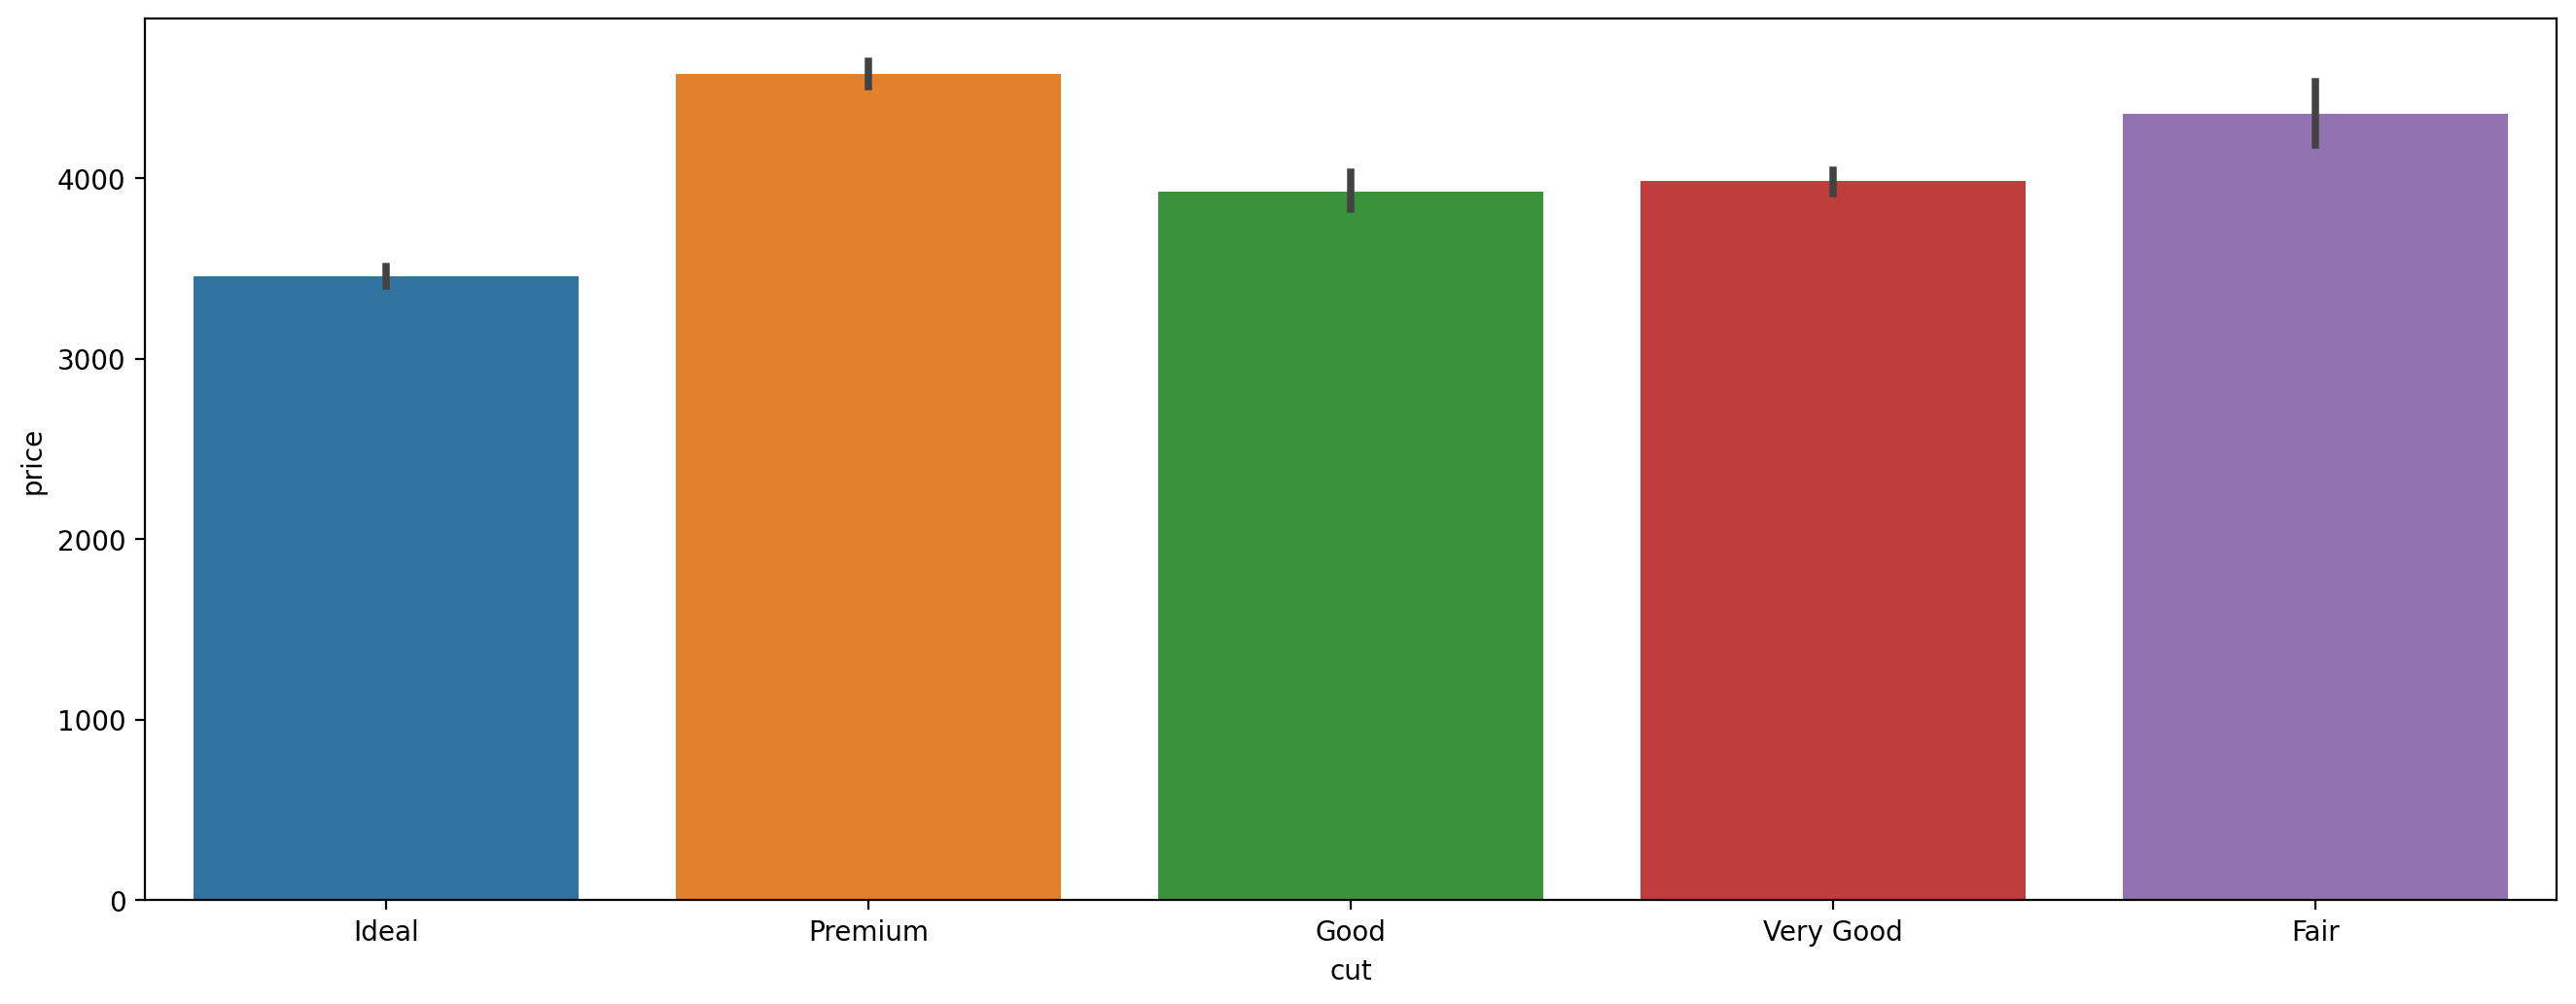

In [38]:
plt.figure(figsize = (16,6),dpi=200)
sns.barplot(data=df,x = df['cut'],y = df['price'])

Text(0, 0.5, 'Price')

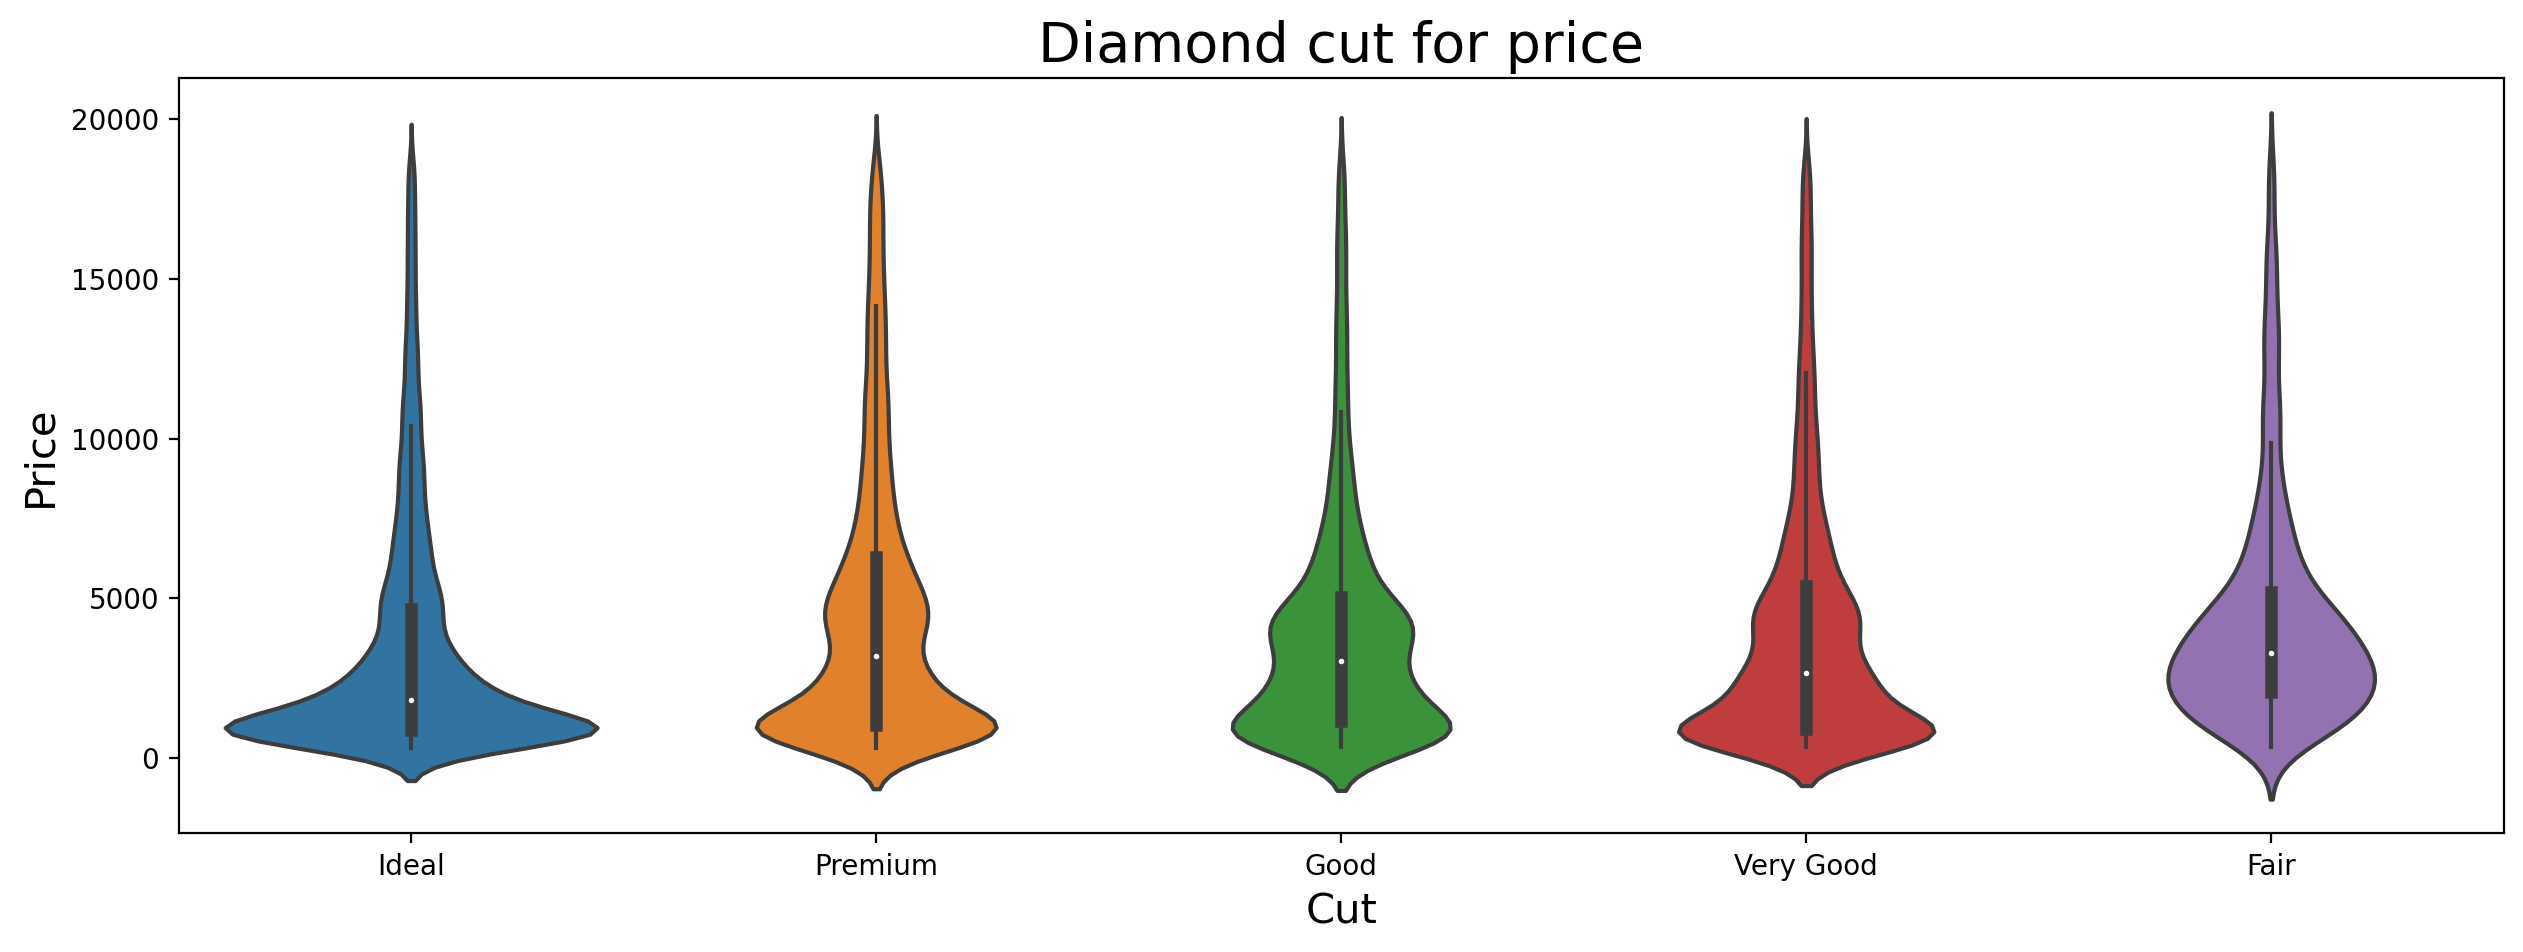

In [39]:
plt.figure(figsize=(15,5),dpi = 200)
sns.violinplot(x = 'cut',y='price',data = df)
plt.title('Diamond cut for price',fontsize = 20)
plt.xlabel('Cut',fontsize = 15)
plt.ylabel('Price',fontsize = 15)

In [ ]:
sns.pairplot(data = df,hue = 'cut')

Text(0.5, 1.0, 'Line Plot on Price vs Width of the diamond (Y)')

<Figure size 3000x1000 with 0 Axes>

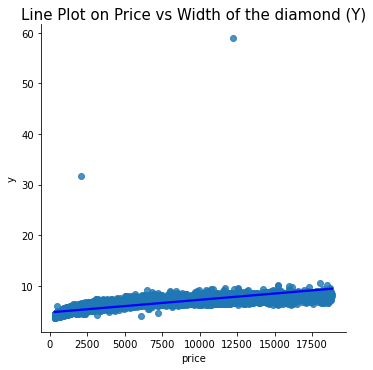

In [41]:
plt.figure(figsize=(15,5),dpi=200)
sns.lmplot(data=df,x = 'price',y = 'y',line_kws={'color':'blue'})
plt.title('Line Plot on Price vs Width of the diamond (Y)',fontsize=15)

Text(0.5, 1.0, 'Line Plot on Price vs Depth of the diamond (Z)')

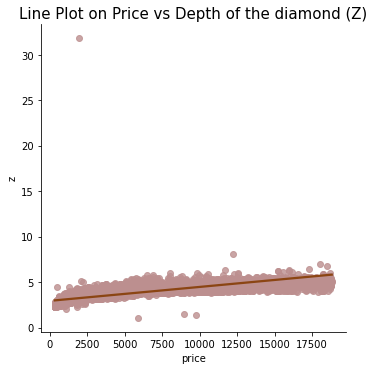

In [42]:
sns.lmplot(x="price", y="z", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title('Line Plot on Price vs Depth of the diamond (Z)',fontsize=15)

In [43]:
df = df.drop(df[df['x']==0].index)
df = df.drop(df[df['y']==0].index)
df = df.drop(df[df['z']==0].index)

In [44]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [71]:
df2 = df.copy()
columns = ['cut','color','clarity']
for col in columns:
  df2[col] = le.fit_transform(df2[col])

<AxesSubplot:>

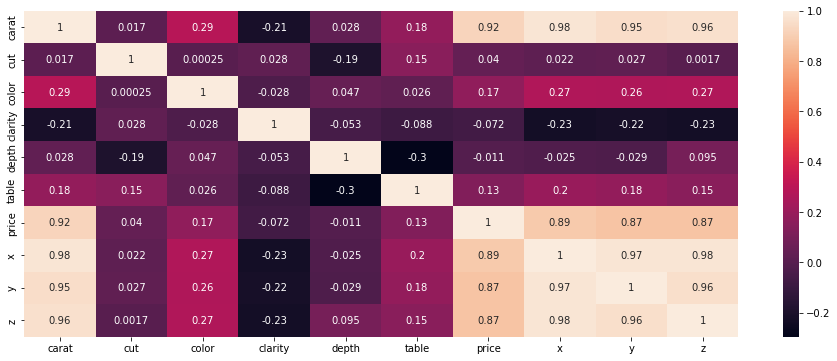

In [72]:
corrmat = df2.corr()
plt.figure(figsize = (16,6))
sns.heatmap(corrmat,annot = True)

In [74]:
X = df2.drop(['price'],axis=1)
y = df2['price']

In [75]:
from sklearn.model_selection import train_test_split  

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True,train_size = 0.8)

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [84]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("accuracy: "+ str(lr.score(X_test,y_test)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 87.85766078452053%
Mean absolute error: 850.0108305462533
Mean squared error: 1863769.5836222363
R Squared: 0.8785766078452053
Adjusted R Squared: 0.8784864559067145


In [86]:
ls = Lasso()
ls.fit(X_train,y_train)
y_pred = ls.predict(X_test)
print("accuracy: "+ str(ls.score(X_test,y_test)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 87.87822555597181%
Mean absolute error: 851.775275881979
Mean squared error: 1860613.025825188
R Squared: 0.8787822555597181
Adjusted R Squared: 0.8786922563063053


In [88]:
rg = Ridge()
rg.fit(X_train,y_train)
y_pred = rg.predict(X_test)
print("accuracy: "+ str(rg.score(X_test,y_test)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 87.862608332691%
Mean absolute error: 850.3548593536502
Mean squared error: 1863010.1673656183
R Squared: 0.87862608332691
Adjusted R Squared: 0.8785359681219554
